# Preprocessing

Priprava dat

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import os
import seaborn as sns
from sklearn import preprocessing

In [2]:
irisdf = pd.read_csv('datasets/IRIS.csv')

In [3]:
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
irisdf.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
print(f'Pocet chybejicich hodnot u iris je: \n{irisdf.isnull().sum()}')

Pocet chybejicich hodnot u iris je: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Missing values

In [6]:
# testovaci df
ukazka = {'jmeno':['Tomas', 'Martin', 'Lukas', 'Karel'], 'vek':[20,32,np.nan,50], 'vaha':[80,90,85,np.nan]}
df = pd.DataFrame(ukazka)

In [7]:
df

,jmeno,vek,vaha
0,Tomas,20.0,80.0
1,Martin,32.0,90.0
2,Lukas,NaN,85.0
3,Karel,50.0,NaN


In [8]:
# zjisteni chybejicich hodnot
df.isnull().sum()

jmeno    0
vek      1
vaha     1
dtype: int64

In [9]:
# odstraneni sloupce
df_clear_vek = df.drop('vek', axis=1)
df_clear_vek

,jmeno,vaha
0,Tomas,80.0
1,Martin,90.0
2,Lukas,85.0
3,Karel,NaN


In [10]:
# odstraneni radku s chybejicim vekem
df_clear_radek = df[df['vek'].notnull()]
df_clear_radek

,jmeno,vek,vaha
0,Tomas,20.0,80.0
1,Martin,32.0,90.0
3,Karel,50.0,NaN


In [11]:
# odstraneni vsech radku s chybejicim udajem v jakemkoliv sloupci
df_clear_radek = df.dropna()
df_clear_radek

,jmeno,vek,vaha
0,Tomas,20.0,80.0
1,Martin,32.0,90.0


In [12]:
# nahrazeni chybejici hodnoty prumernou hodnotu u jednotlivych sloupcu
prumVek = df['vek'].mean()
print(df)
df['vek'].fillna(prumVek)

    jmeno   vek  vaha
0   Tomas  20.0  80.0
1  Martin  32.0  90.0
2   Lukas   NaN  85.0
3   Karel  50.0   NaN


0    20.0
1    32.0
2    34.0
3    50.0
Name: vek, dtype: float64

In [13]:
prumVaha = df['vaha'].mean()
print(df)
df['vaha'].fillna(prumVaha)

    jmeno   vek  vaha
0   Tomas  20.0  80.0
1  Martin  32.0  90.0
2   Lukas   NaN  85.0
3   Karel  50.0   NaN


0    80.0
1    90.0
2    85.0
3    85.0
Name: vaha, dtype: float64

## Encoding

In [14]:
irisdf.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
# vytvoreni df encodeddf
# -get_dummies udela z jednoho sloupce vice sloupcu a jejich hodnoty pouzije jako nazvy sloupcu
encodeddf = pd.get_dummies(irisdf, prefix=['species'])

In [16]:
encodeddf.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
40,5.0,3.5,1.3,0.3,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
61,5.9,3.0,4.2,1.5,0,1,0
148,6.2,3.4,5.4,2.3,0,0,1
26,5.0,3.4,1.6,0.4,1,0,0
48,5.3,3.7,1.5,0.2,1,0,0
81,5.5,2.4,3.7,1.0,0,1,0
138,6.0,3.0,4.8,1.8,0,0,1
76,6.8,2.8,4.8,1.4,0,1,0
127,6.1,3.0,4.9,1.8,0,0,1


In [17]:
from sklearn import preprocessing

In [18]:
# nahrazeni sloupce se string integerem. 
labelEncoder = preprocessing.LabelEncoder()
irisdf['species_enc'] = labelEncoder.fit_transform(irisdf['species'])

In [19]:
irisdf.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
80,5.5,2.4,3.8,1.1,Iris-versicolor,1
123,6.3,2.7,4.9,1.8,Iris-virginica,2
51,6.4,3.2,4.5,1.5,Iris-versicolor,1
63,6.1,2.9,4.7,1.4,Iris-versicolor,1
102,7.1,3.0,5.9,2.1,Iris-virginica,2
108,6.7,2.5,5.8,1.8,Iris-virginica,2
31,5.4,3.4,1.5,0.4,Iris-setosa,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,1
86,6.7,3.1,4.7,1.5,Iris-versicolor,1
38,4.4,3.0,1.3,0.2,Iris-setosa,0


## Feature scaling

In [20]:
irisdf = pd.read_csv('datasets/IRIS.csv')
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.DataFrame({'vek': [20,30,40], 'zostatok': [40000, 42500, 50000]})

In [23]:
print(df, '\n')

   vek  zostatok
0   20     40000
1   30     42500
2   40     50000 



In [24]:
dfMean = np.mean(df)
print(f'Prumer je: \n{dfMean}')

Prumer je: 
vek            30.000000
zostatok    44166.666667
dtype: float64


In [25]:
dfSTD = np.std(df)
print(f'STD je: \n{dfSTD}')

STD je: 
vek            8.164966
zostatok    4249.182928
dtype: float64


In [26]:
scaler = StandardScaler()
norm = scaler.fit_transform(df)

In [27]:
norm

array([[-1.22474487, -0.98058068],
       [ 0.        , -0.39223227],
       [ 1.22474487,  1.37281295]])

## Feature selection

In [28]:
irisdf = pd.read_csv('datasets/IRIS.csv')
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# nahrazeni sloupce se string integerem. 
labelEncoder = preprocessing.LabelEncoder()
irisdf['species_enc'] = labelEncoder.fit_transform(irisdf['species'])

In [30]:
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [31]:
# corr vytvori korelacni matici, pocita jen z ciselnymi atributmi a proto zmizel species

irisdf.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_enc
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_enc,0.782561,-0.419446,0.949043,0.956464,1.000000


za feature zvolime petal_length a petal_width

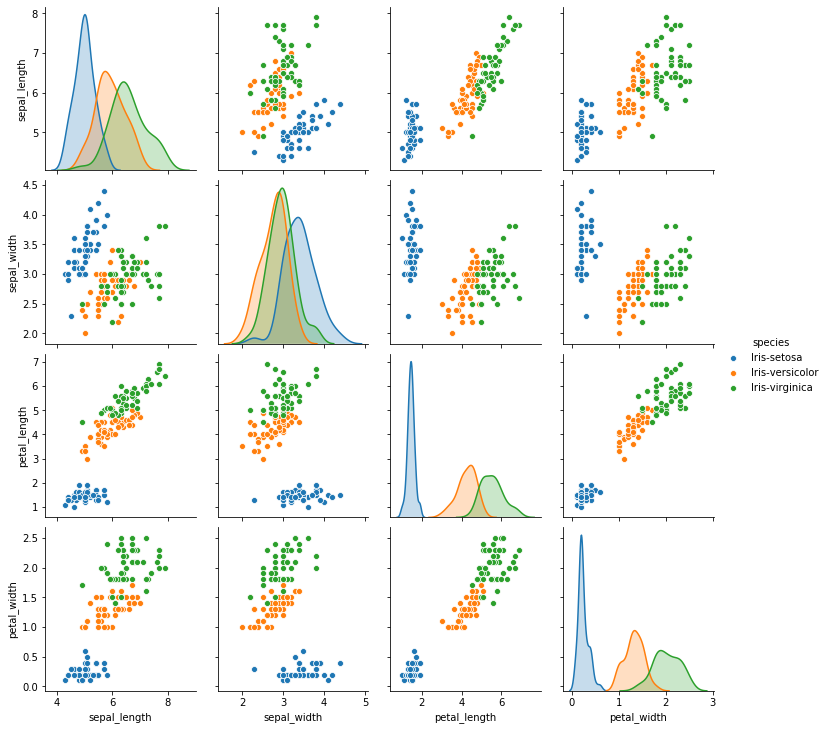

In [32]:
# drop odstrani sloupec species_enc, paiplot potrebuje pandas soubor
# dostaneme 16 minigrafu
print(sns.pairplot(irisdf.drop('species_enc', axis=1), hue='species'))

# Overfitting x Underfitting

### přeučení (overfitting)

příliš silný model sice má velmi malou chybu na trénovacích
datech, ale velkou chybu na datech, která předtím neviděl

např. máme-li 18 trénovacích instancí, umíme jimi proložit
polynom stupně 17 tak, že chybová funkce bude 0, ale pokud
se ve skutečnosti jedná o data s lineární závislostí (a chybou
měření), bylo by lepší použít lineární funkci

### nedoučení (underfitting)

příliš slabý model nemá dostatečnou expresivitu na to, aby
vystihl zákonitosti v datech

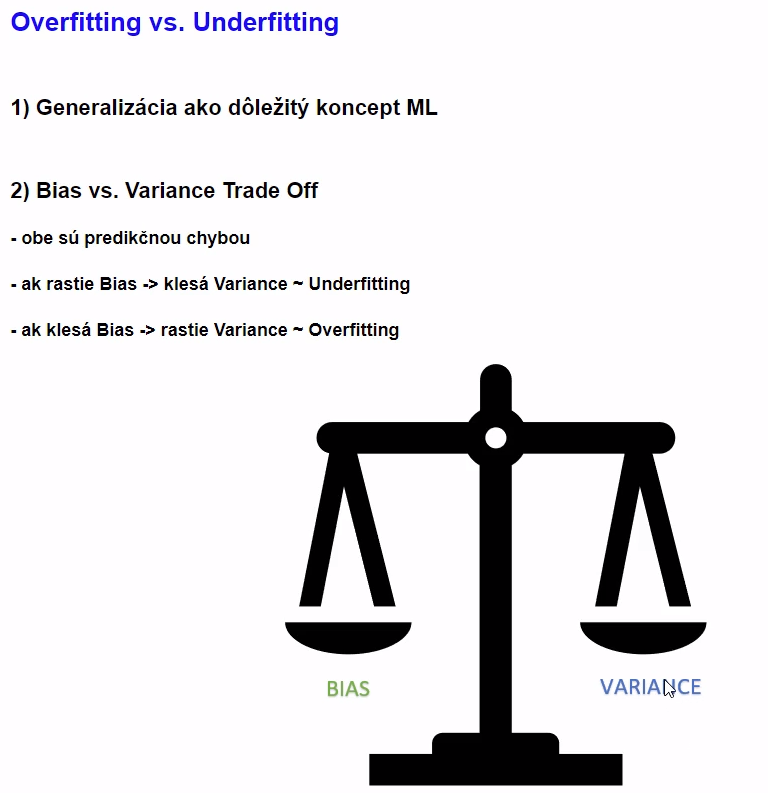

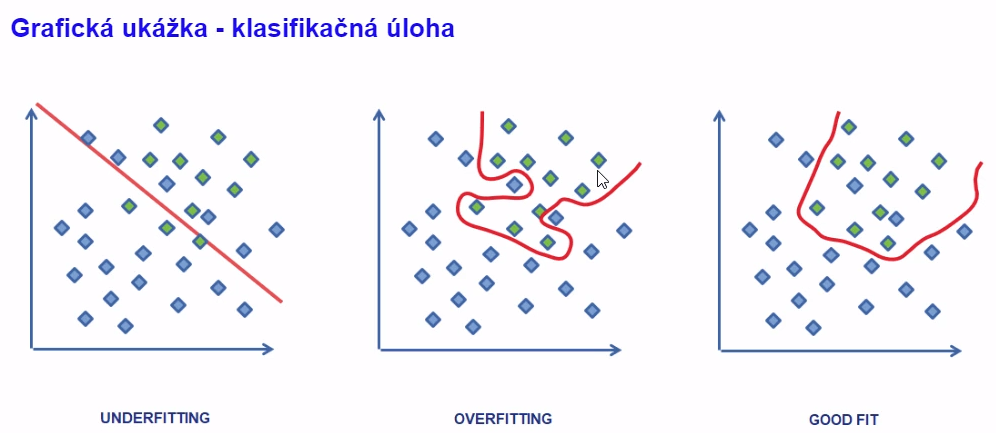

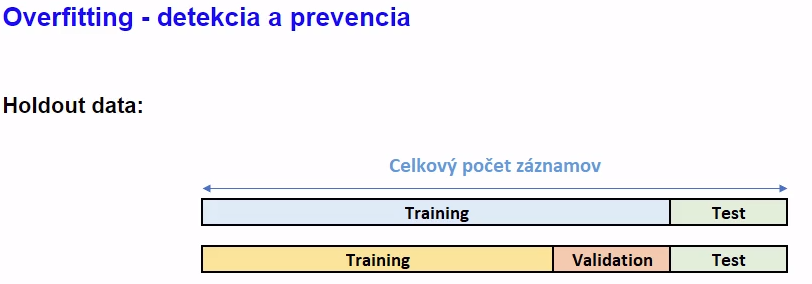

In [43]:
data = [1,2,3,4,5]
# train_test_split rozdeli data
from sklearn.model_selection import train_test_split
# rozdelime data 80:20 pomoci test_size
train1, test = train_test_split(data, test_size=0.2)

In [44]:
test

[4]

In [45]:
train1

[1, 5, 2, 3]

In [46]:
train2, validation = train_test_split(train1, test_size=0.25)

In [47]:
train2

[5, 1, 2]

In [48]:
validation

[3]

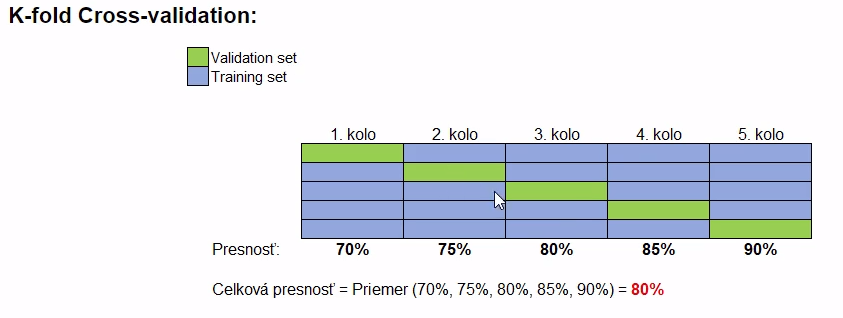